In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Context 
### In the rapidly evolving field of data science, understanding the trends and patterns in salaries is crucial for professionals and organizations alike. This dataset aims to shed light on the landscape of Data Science Salaries from 2020 to 2024. By analyzing salary data over this period, data enthusiasts, researchers, and industry professionals can gain valuable insights into salary trends, regional variations, and potential factors influencing compensation within the data science community.

### Content
### The dataset encompasses a comprehensive collection of data science salary information, covering a span of five years from 2020 to 2024. The data includes various aspects related to salaries, providing a multifaceted view of compensation in the field.

### Reading the dataset.

In [2]:
df=pd.read_csv("data_science_salaries.csv")

In [3]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


### There are 11 column and 6599 rows in dataset.
### Checking for any null and duplicate values present in dataset.

In [5]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [6]:
df[df.duplicated()]

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size


### There are no null as well as duplicate values present in dataset.

In [7]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


### EDA

### Plotting the count plot of various columns of dataframe.

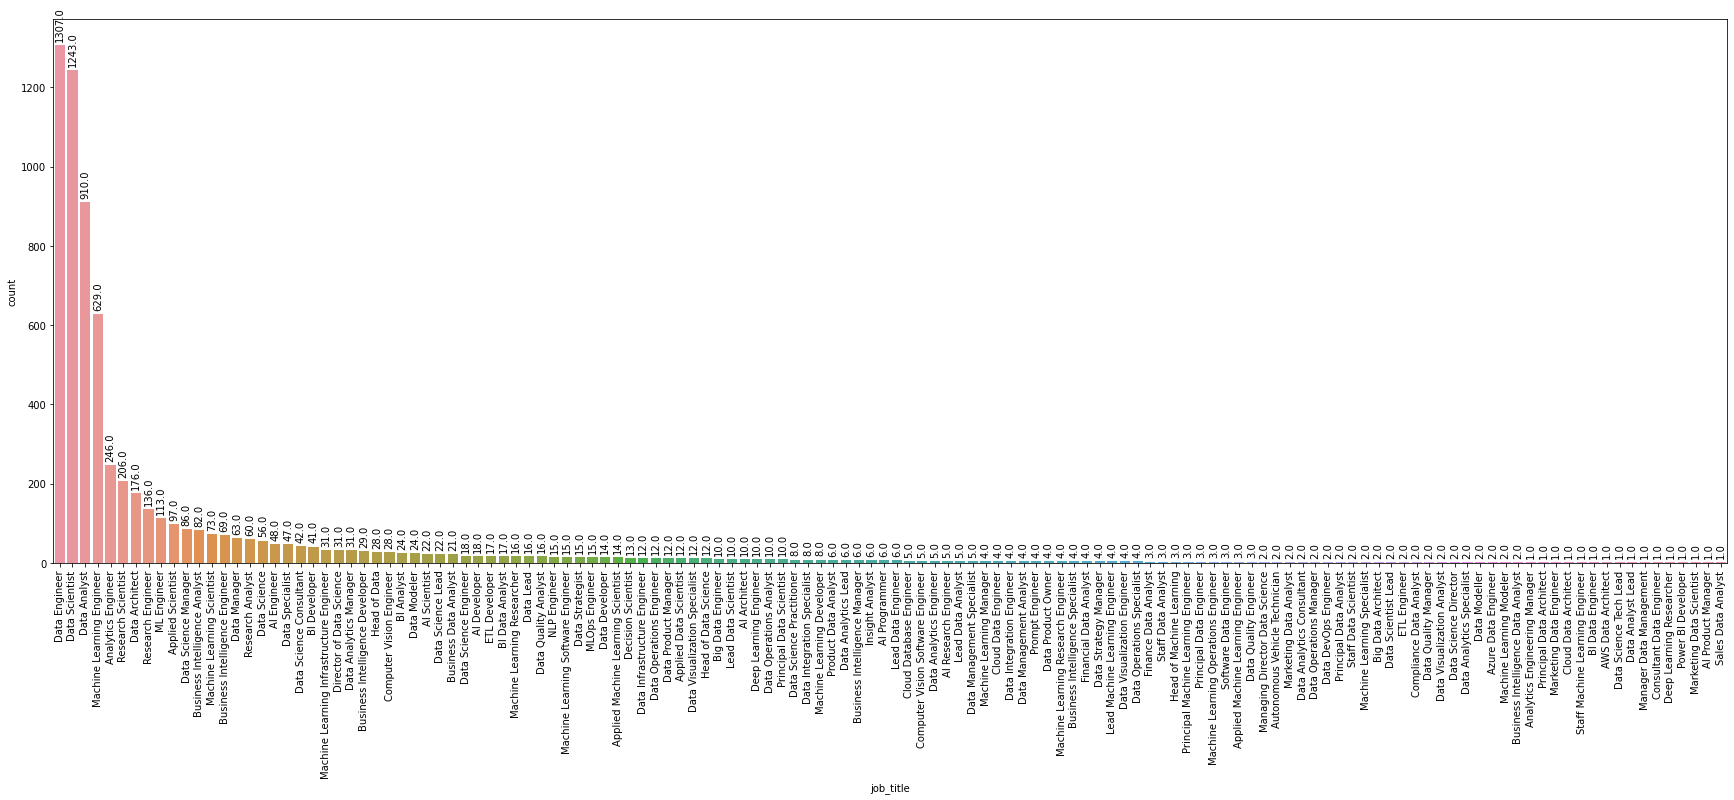

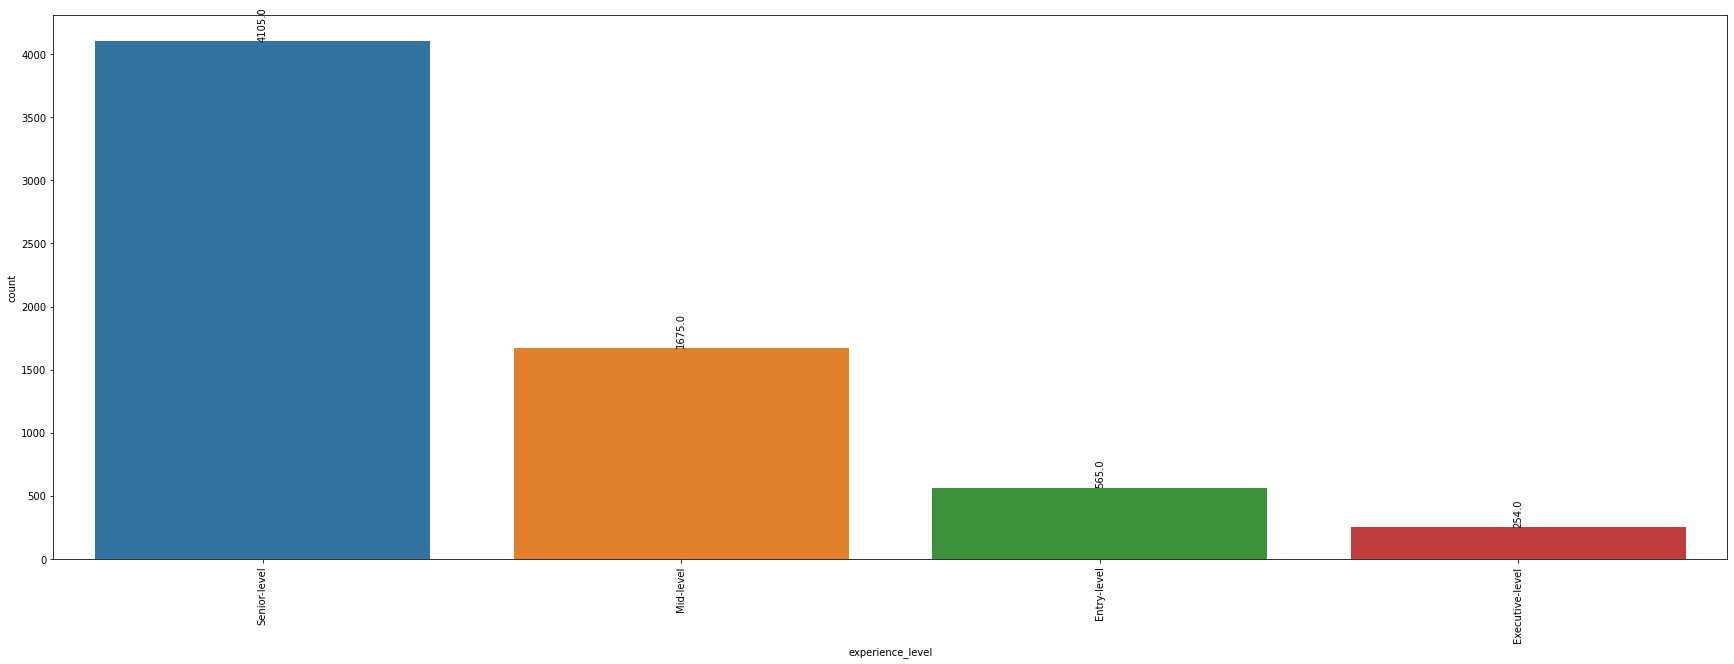

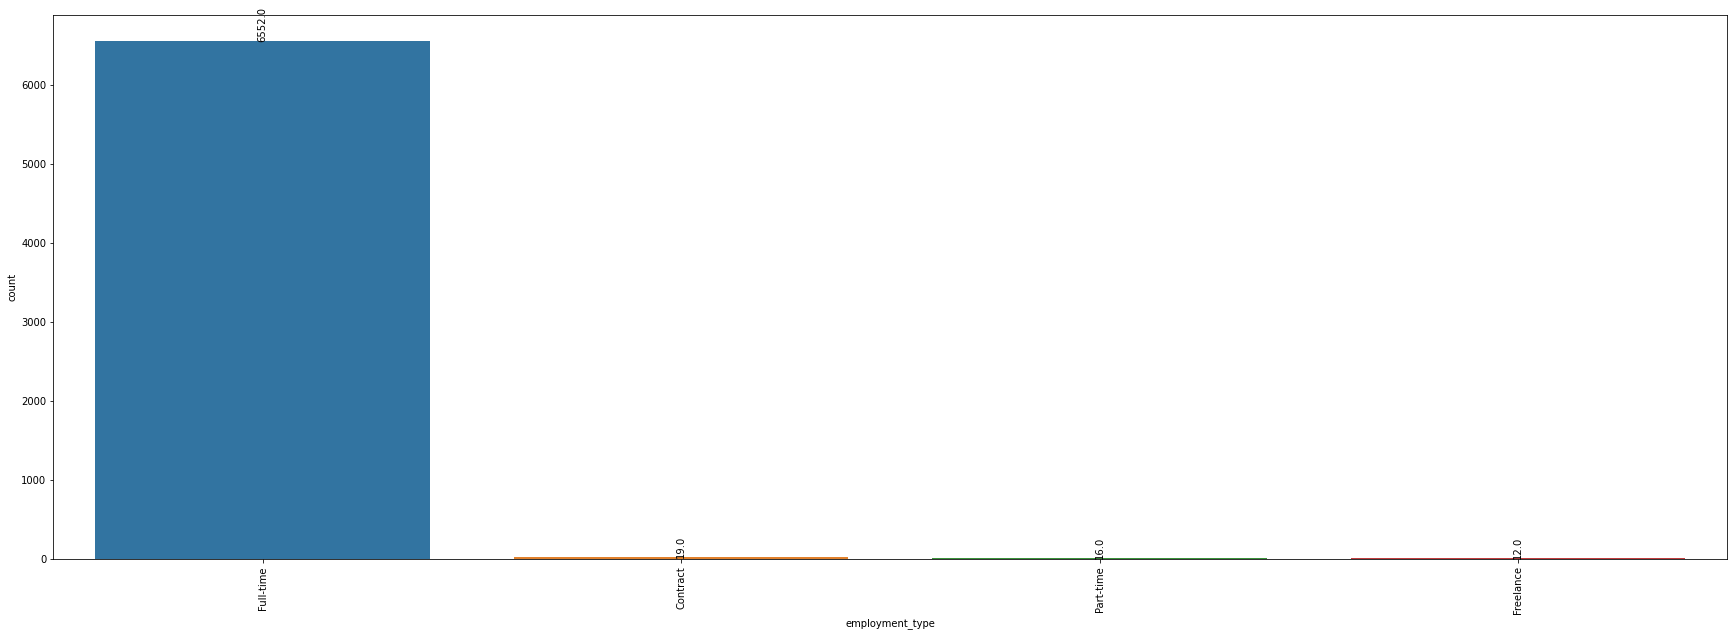

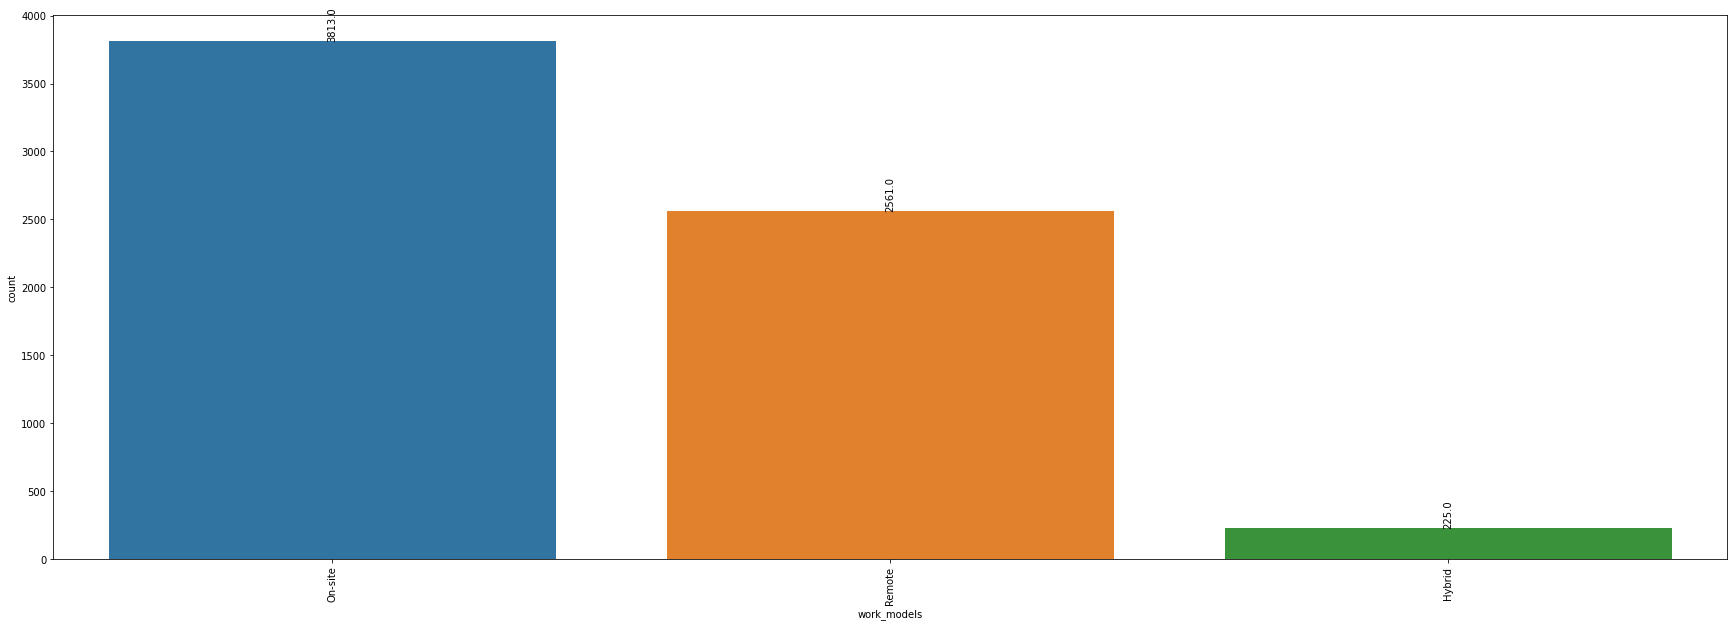

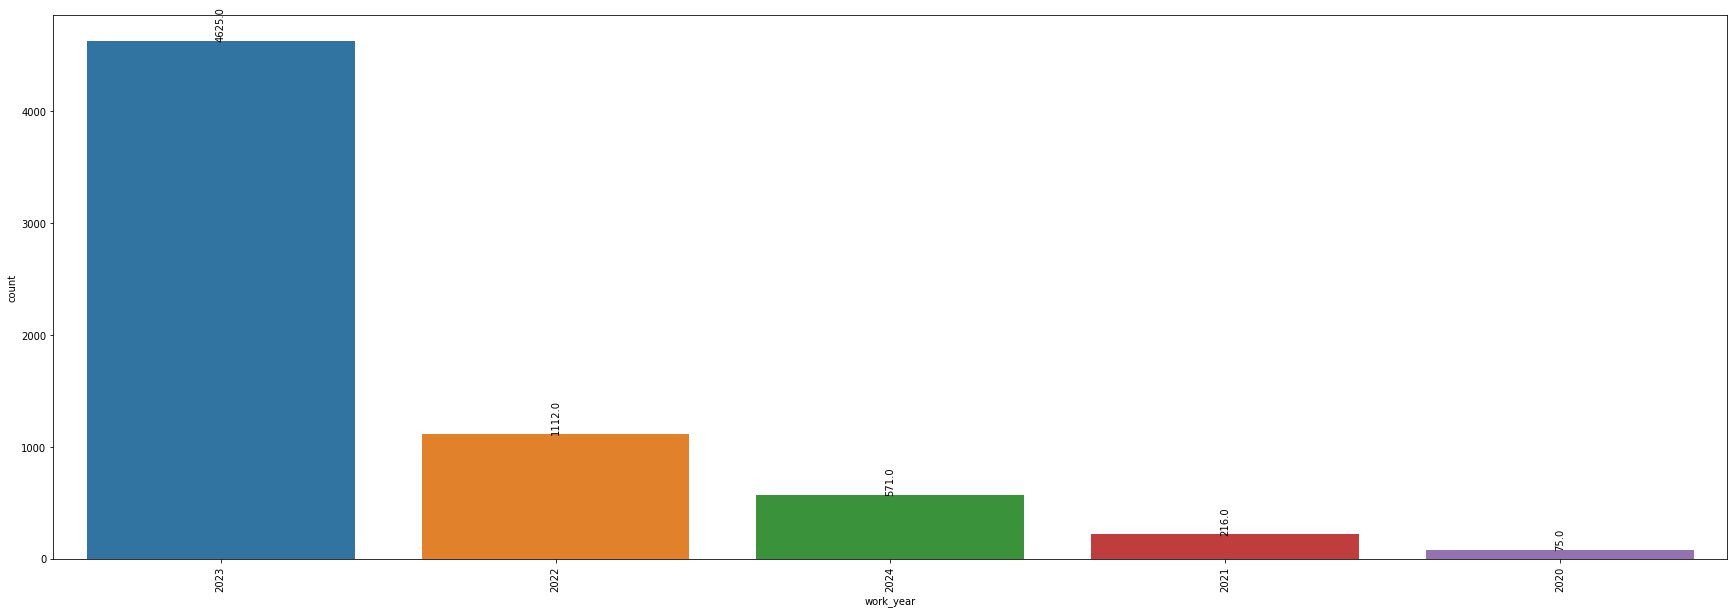

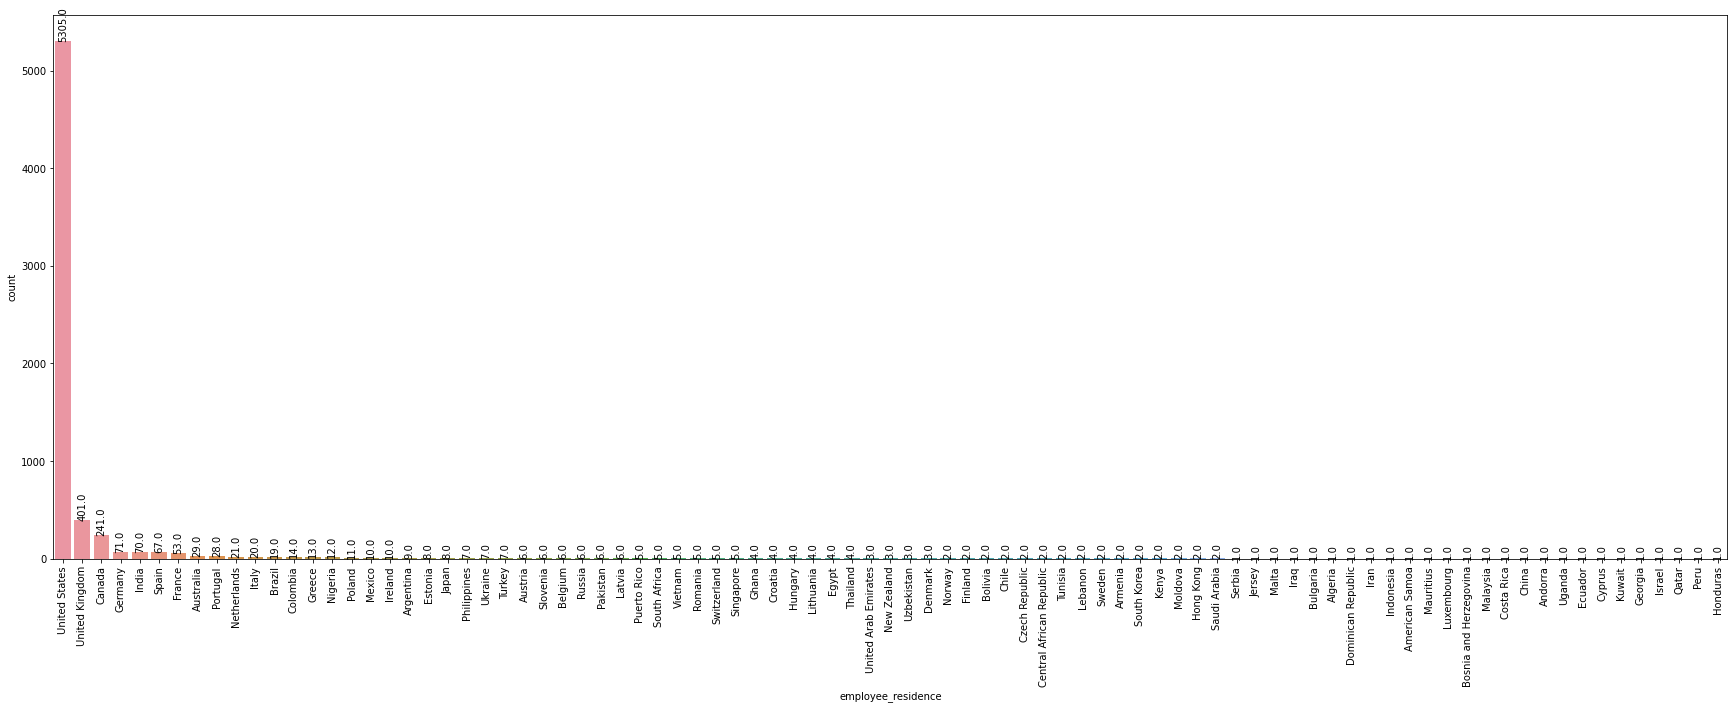

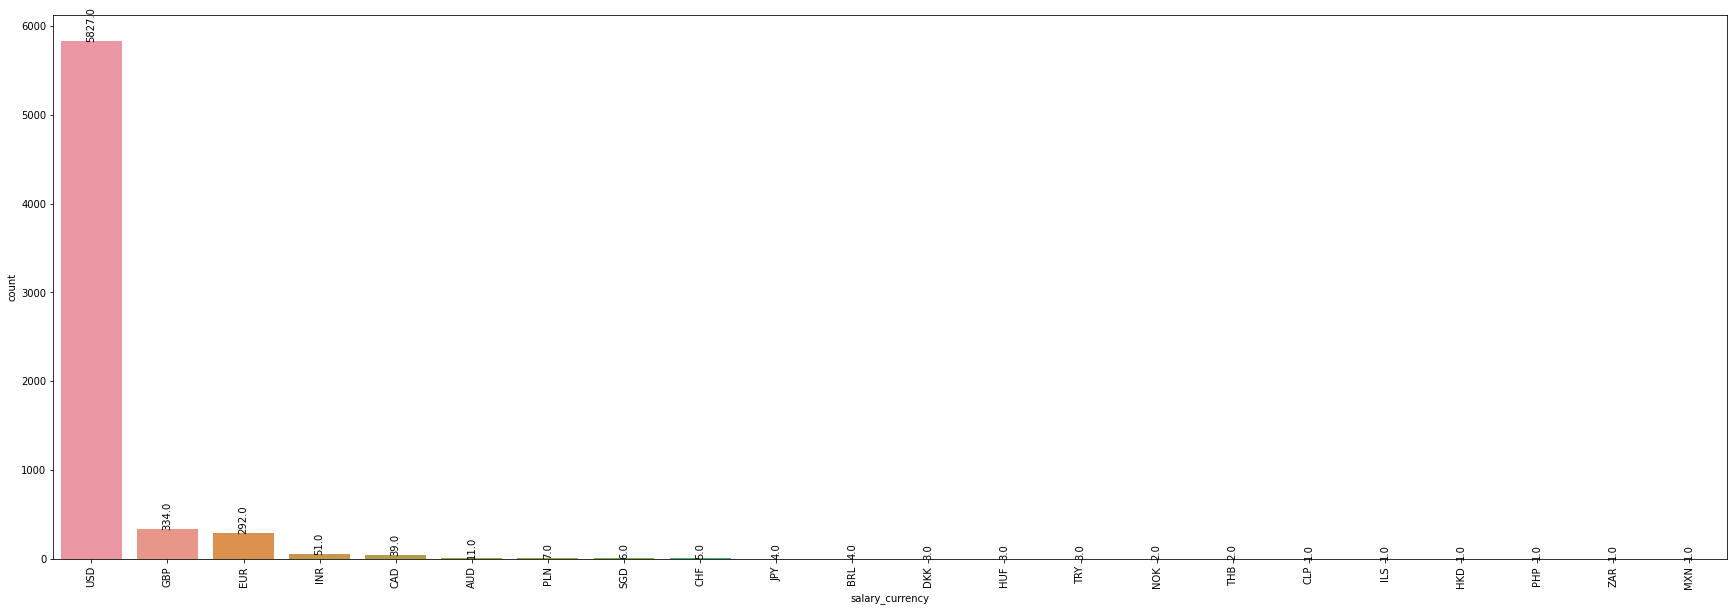

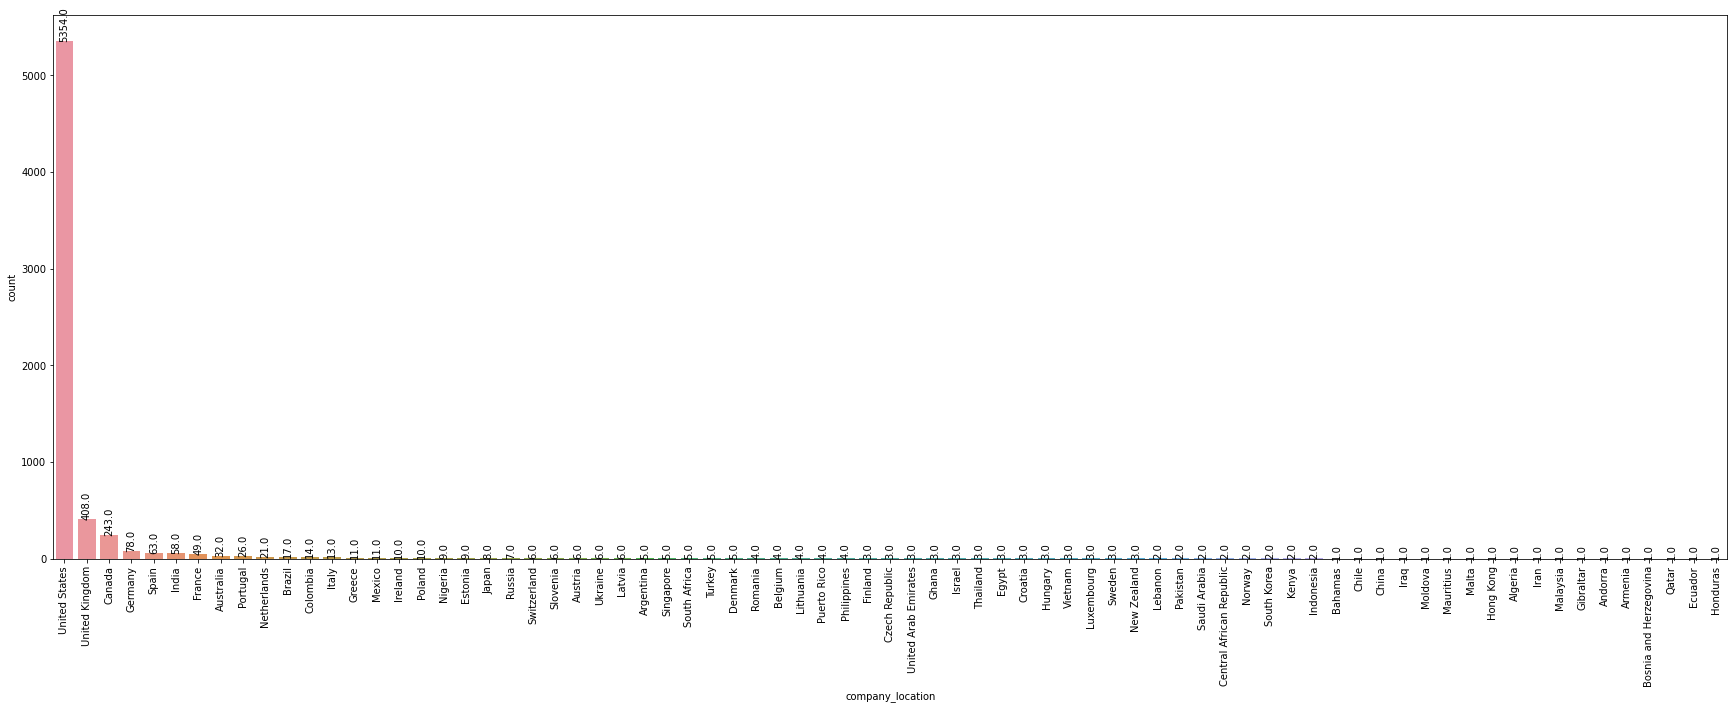

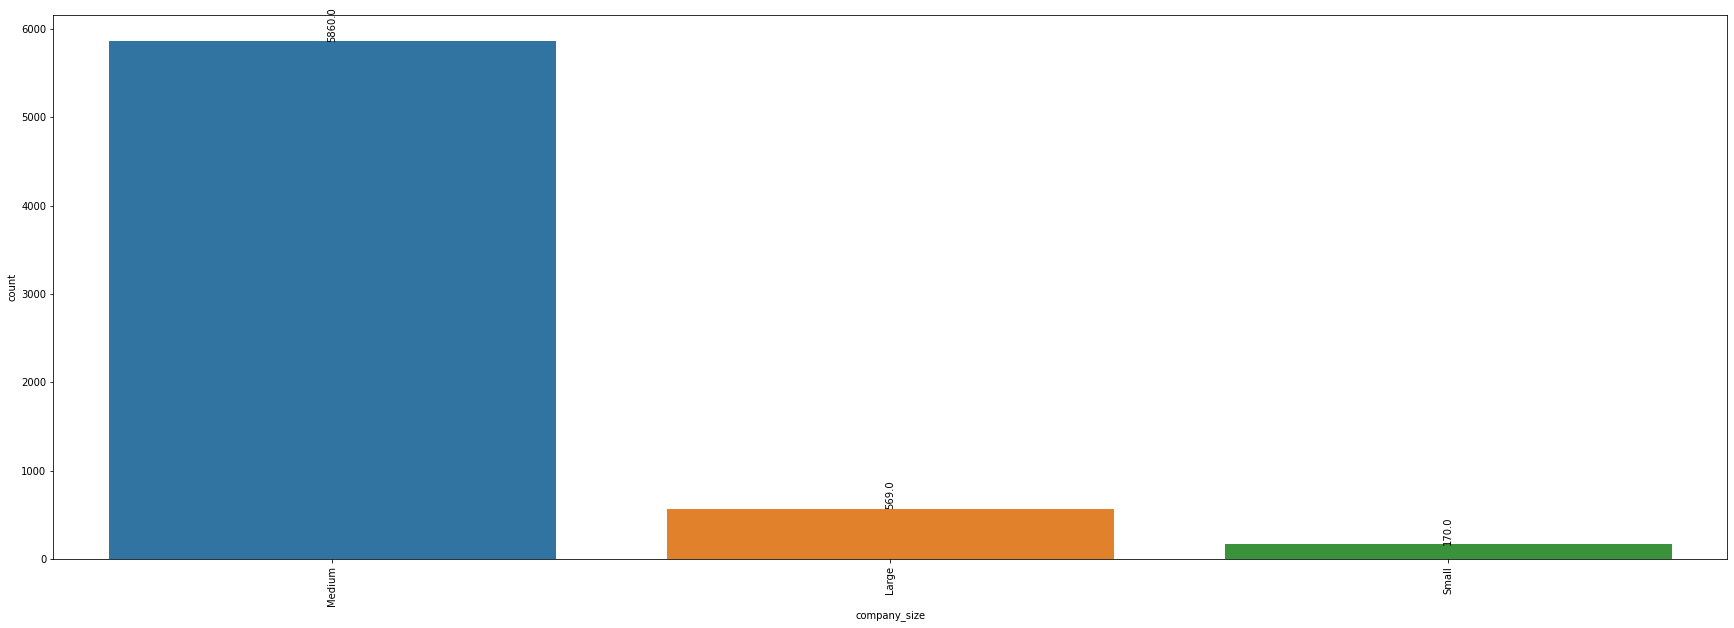

In [8]:
for i in df.columns:
    if i!='salary' and i!='salary_in_usd':
        plt.figure(figsize=(30,10))
        ax=sns.countplot(data=df, x=df[i], order = df[i].value_counts().index)
        plt.xticks(rotation=90)
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ p.get_width() / 2, p.get_height()+15.0),ha='center',rotation=90)
        plt.show()

### Annotating maximum and minimum salary of each job title.

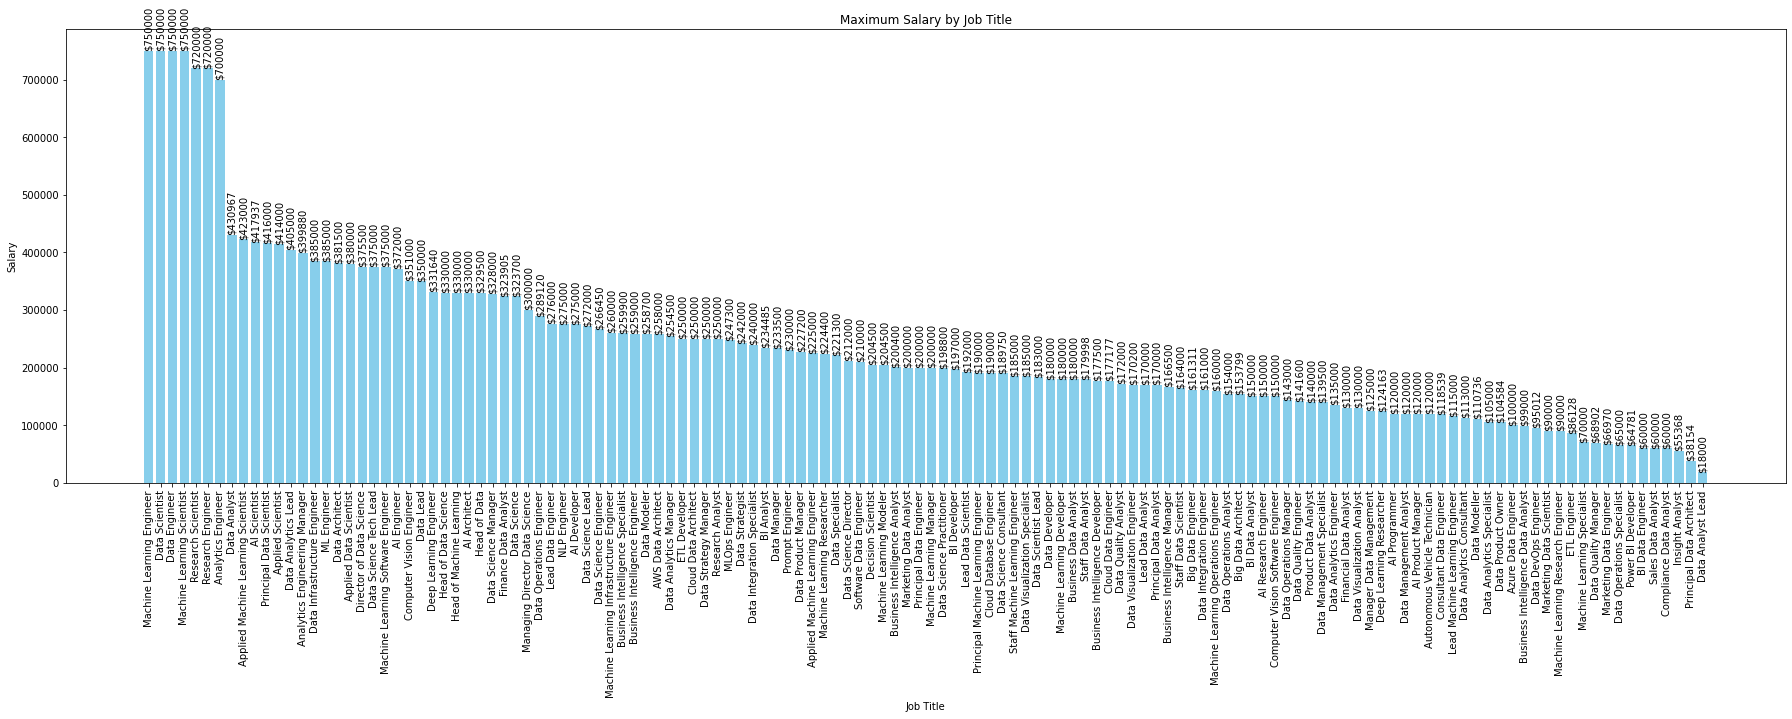

In [9]:
max_salaries=df.groupby('job_title')['salary_in_usd'].max()
sorted_max_salaries=max_salaries.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(sorted_max_salaries.index, sorted_max_salaries.values, color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Maximum Salary by Job Title')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the maximum salary for each job title
for i, salary in enumerate(sorted_max_salaries):
    plt.text(i, salary, f"${salary}", ha='center', va='bottom', rotation=90)

plt.show()

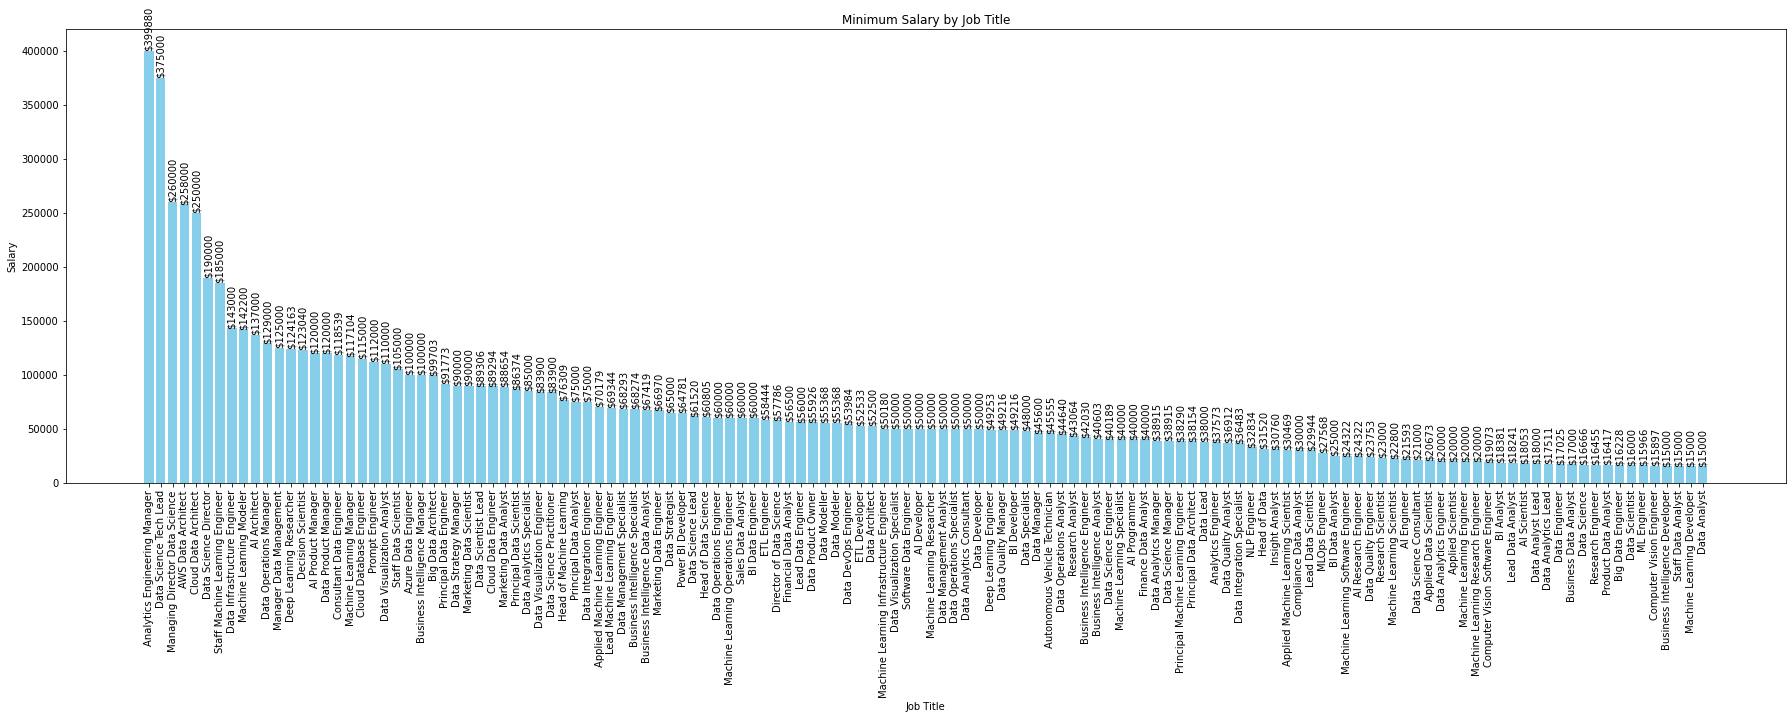

In [10]:
min_salaries=df.groupby('job_title')['salary_in_usd'].min()
sorted_min_salaries=min_salaries.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(sorted_min_salaries.index, sorted_min_salaries.values, color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Minimum Salary by Job Title')
plt.xticks(rotation=90)  
plt.tight_layout()
# Annotate the mimimum salary for each job title
for i, salary in enumerate(sorted_min_salaries):
    plt.text(i, salary, f"${salary}", ha='center', va='bottom', rotation=90)

plt.show()

### Yearwise salary wrt experience level, employement type, work models and company size with different hue parameter.

### Keeping hue parameter experience level, employement type, work models and company size

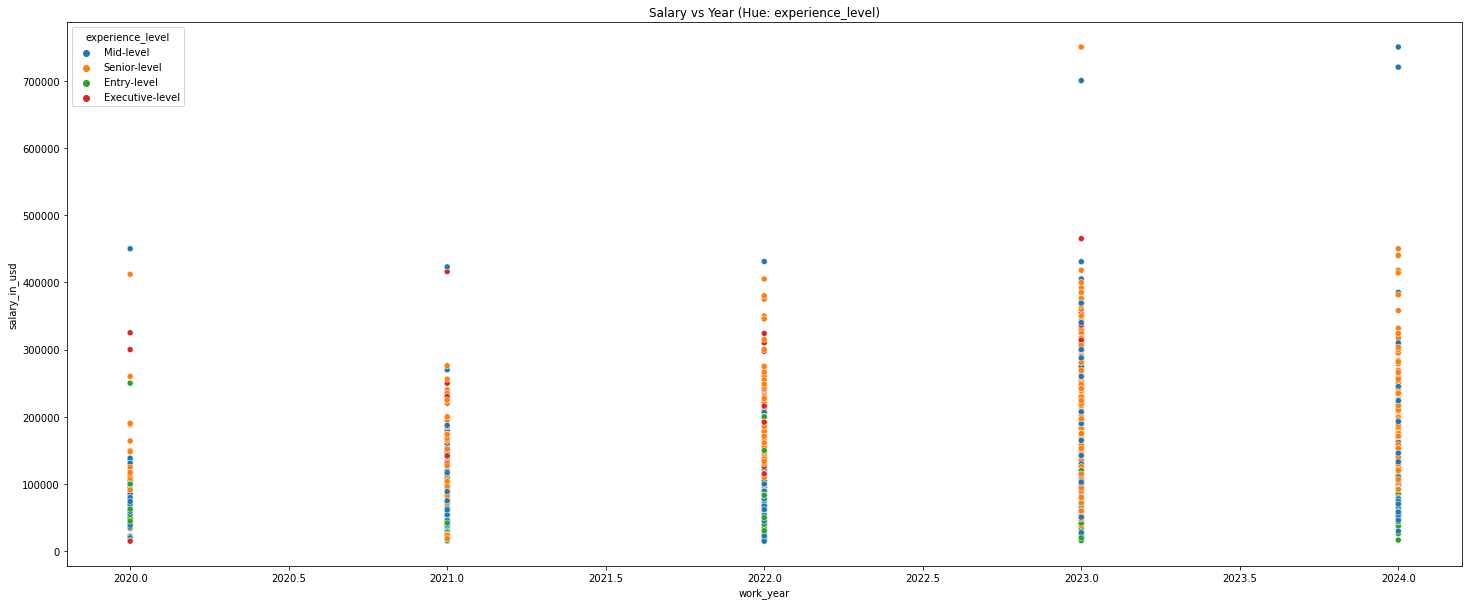

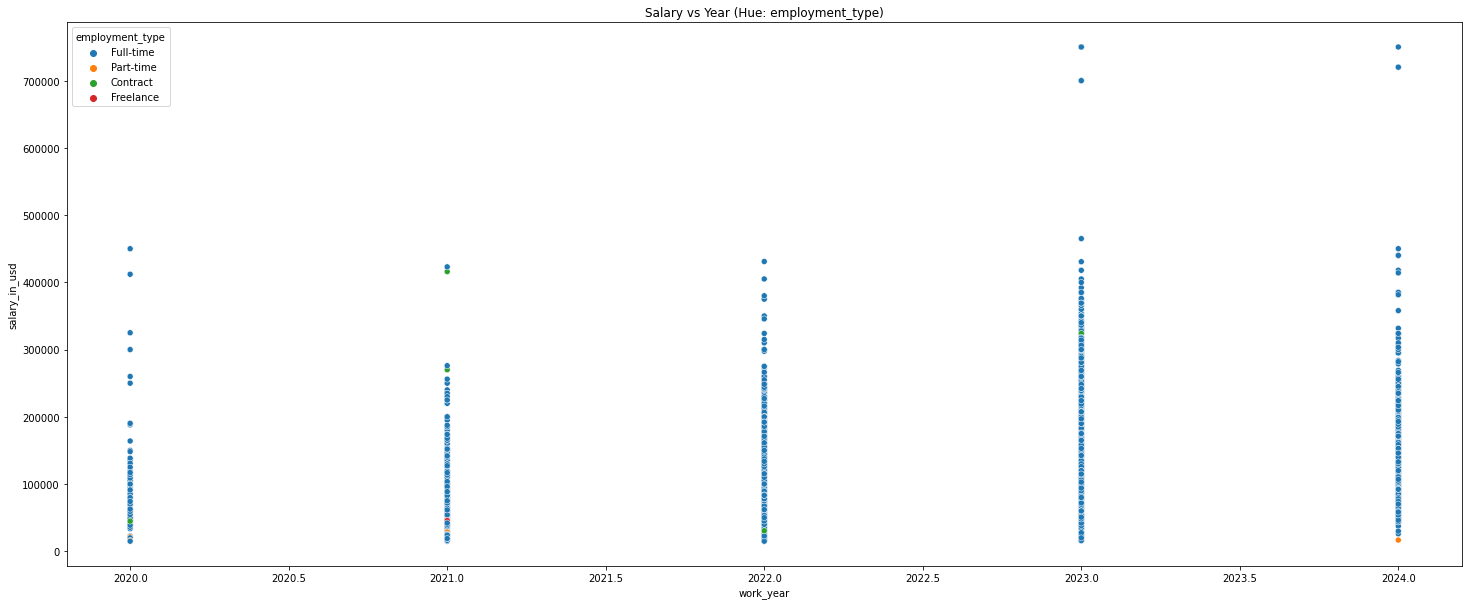

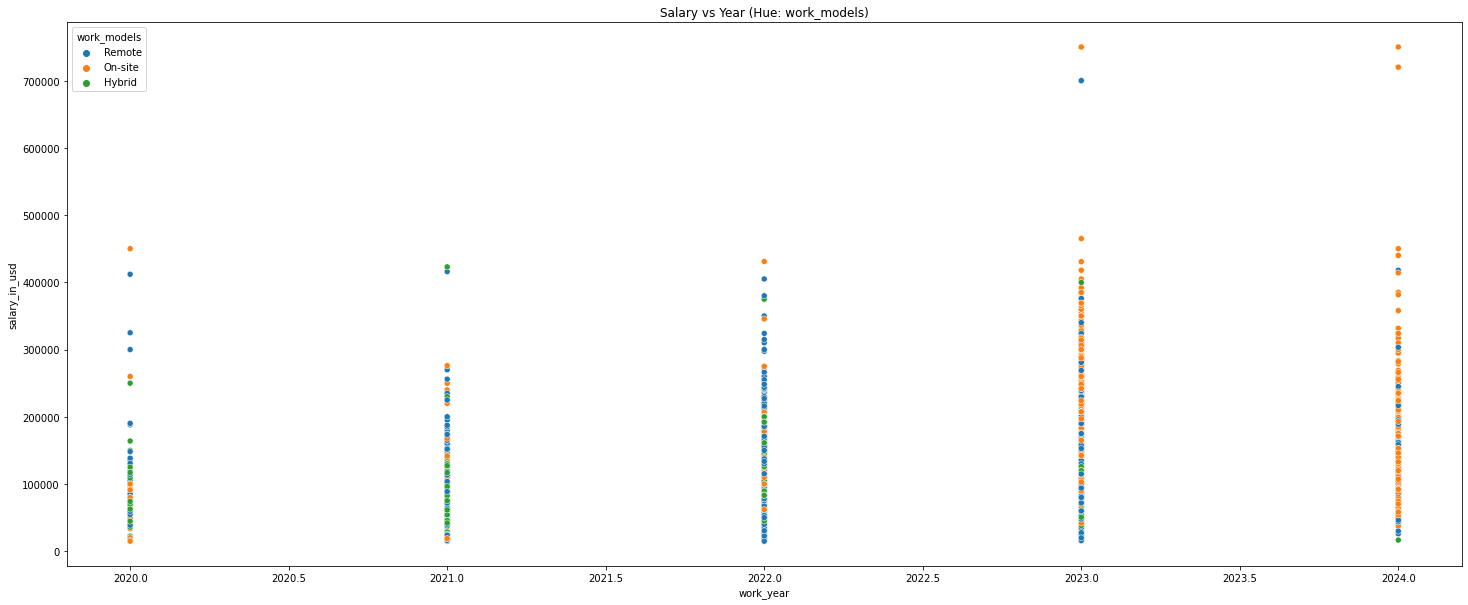

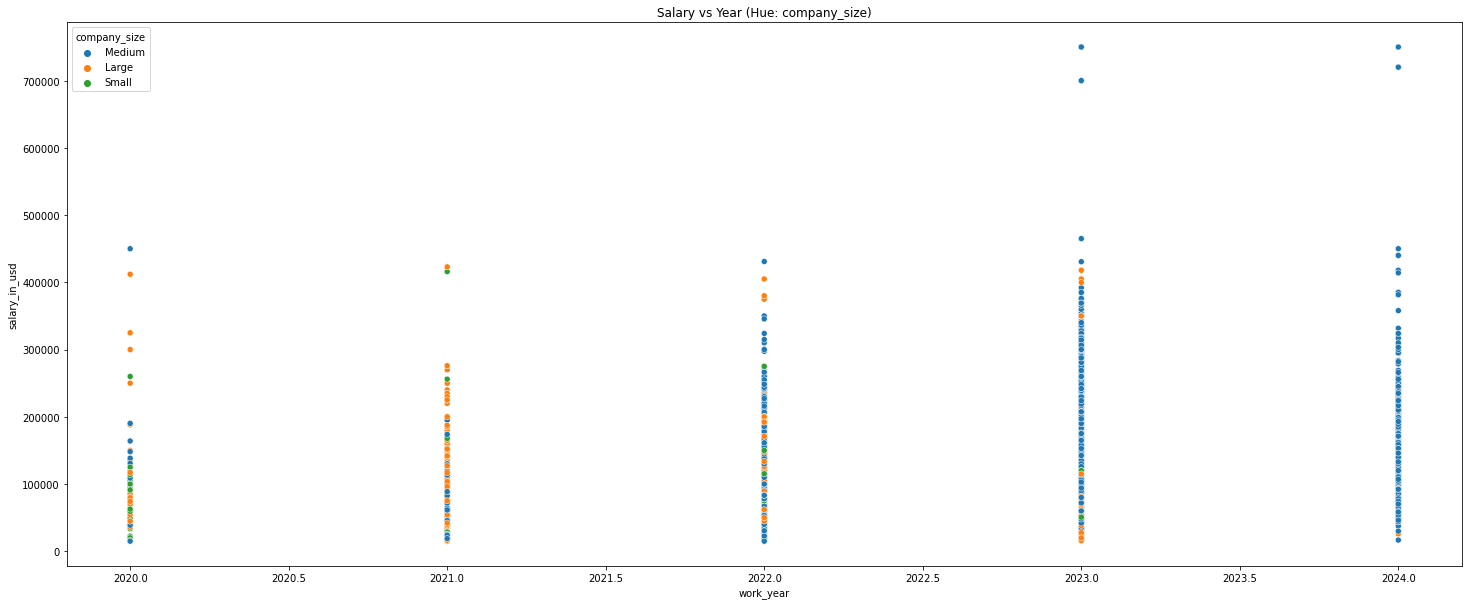

In [11]:
column_for_hue = ['experience_level','employment_type','work_models','company_size']
for i in column_for_hue:
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=df,x="work_year",y="salary_in_usd", hue=i)
    plt.title(f'Salary vs Year (Hue: {i})')
    plt.legend(title=i)
    plt.show()

### Keeping hue parameter work year.

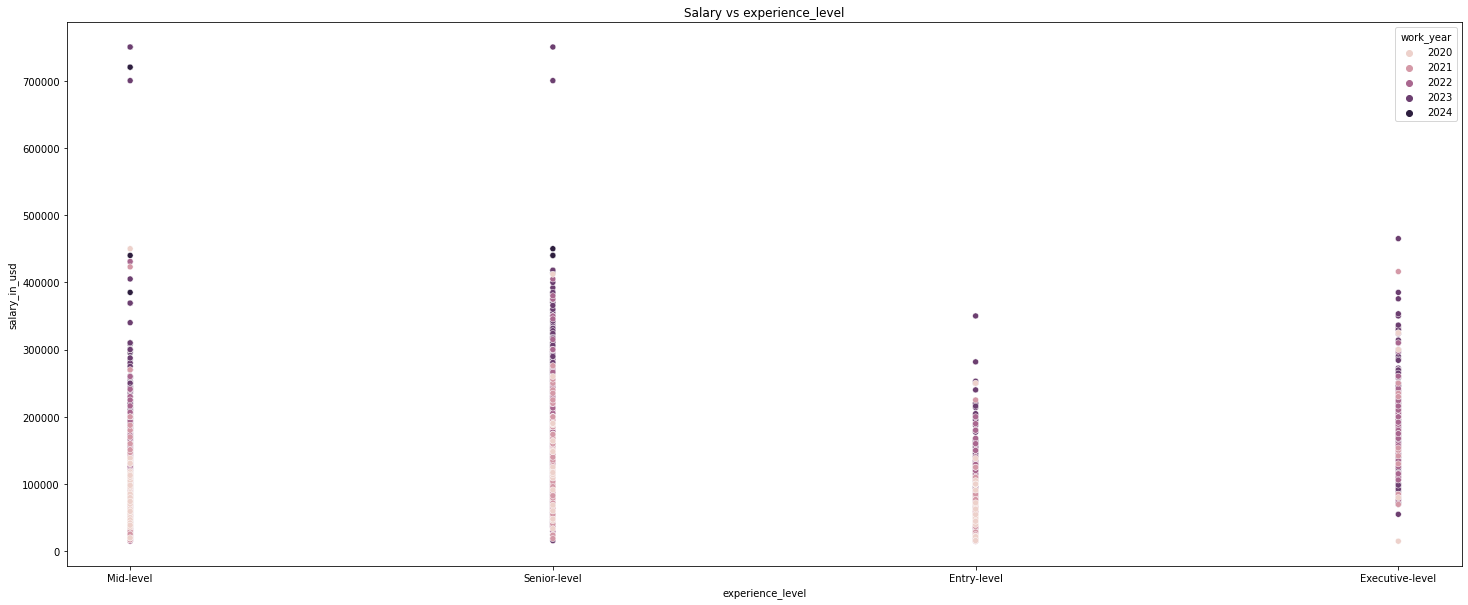

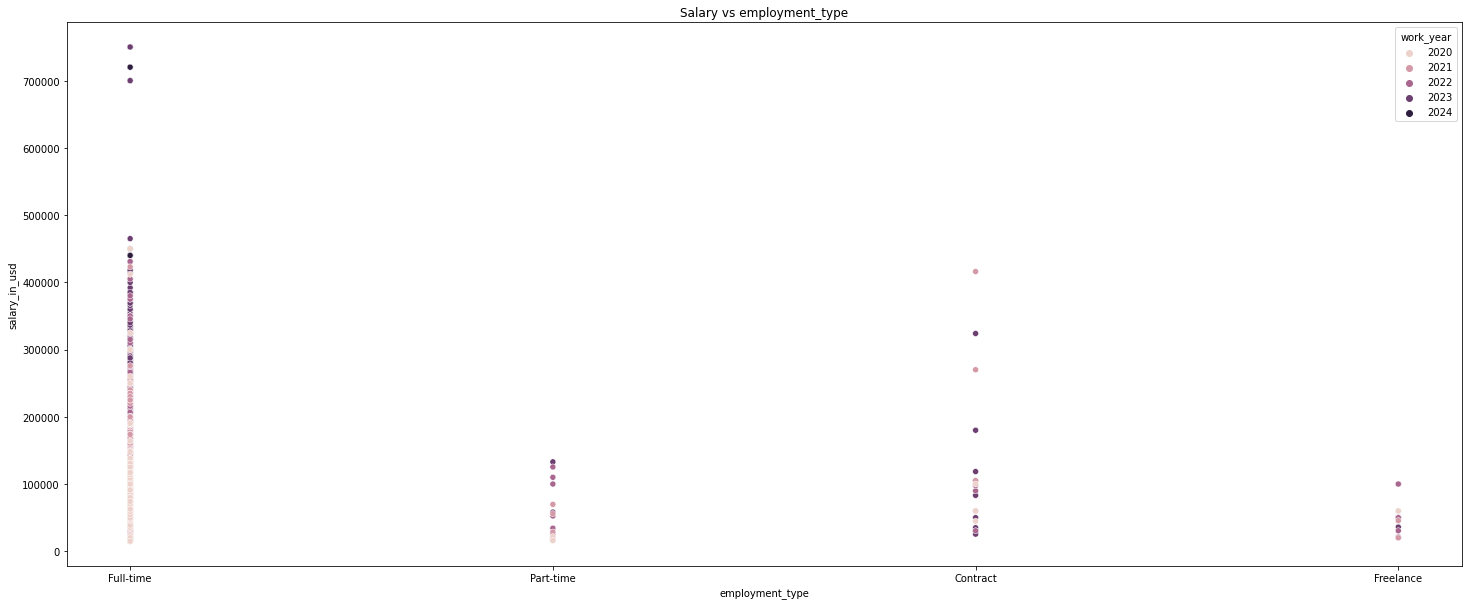

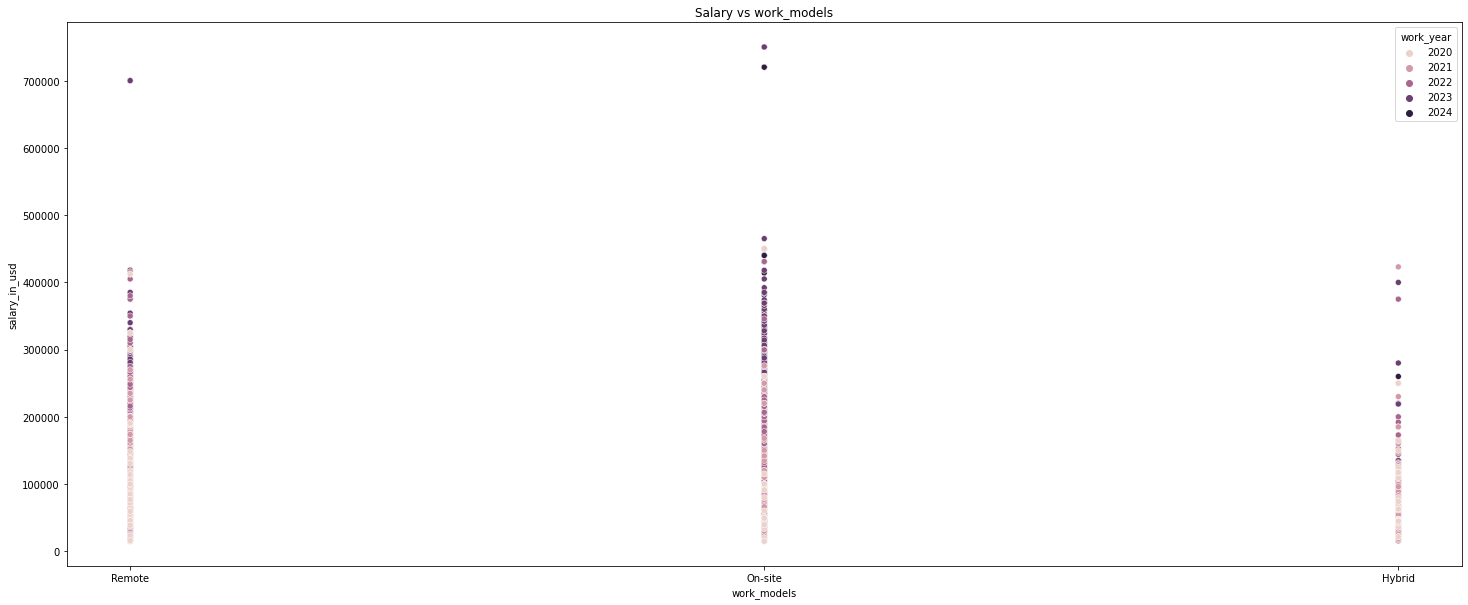

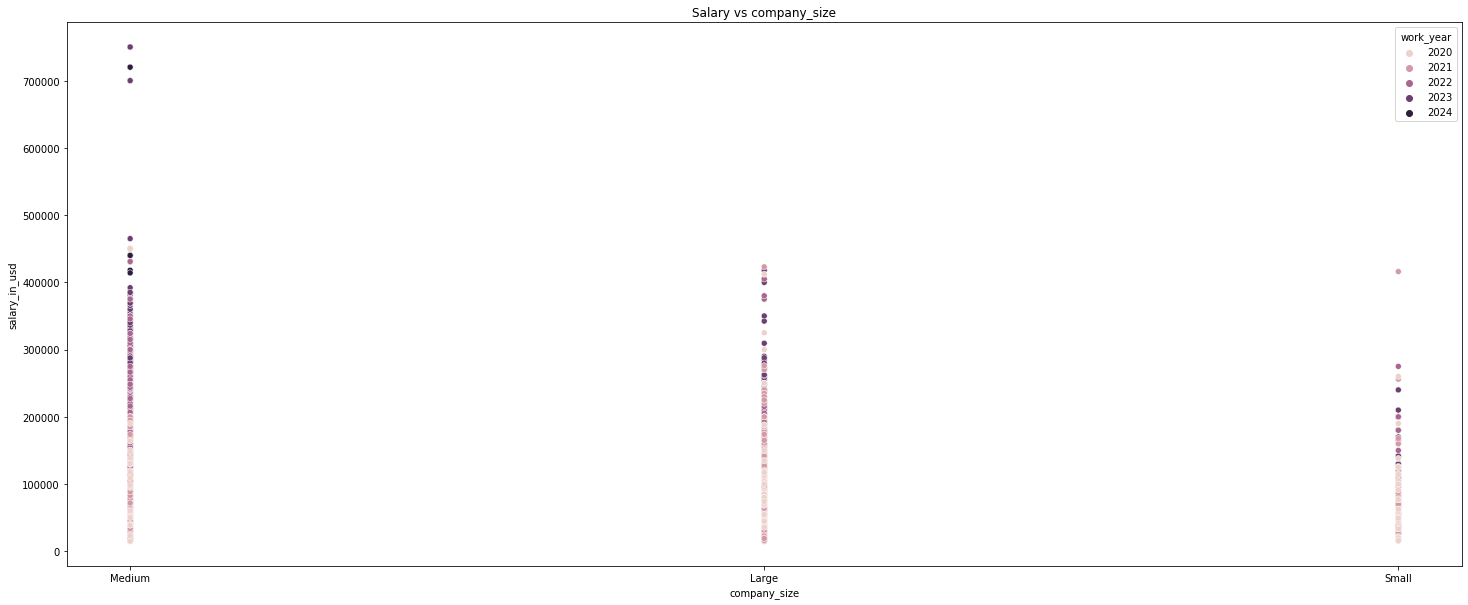

In [12]:
column = ['experience_level','employment_type','work_models','company_size']
for i in column:
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=df,x=i,y="salary_in_usd", hue= 'work_year')
    plt.title(f'Salary vs {i}')
    plt.show()

### Company locationwise salary

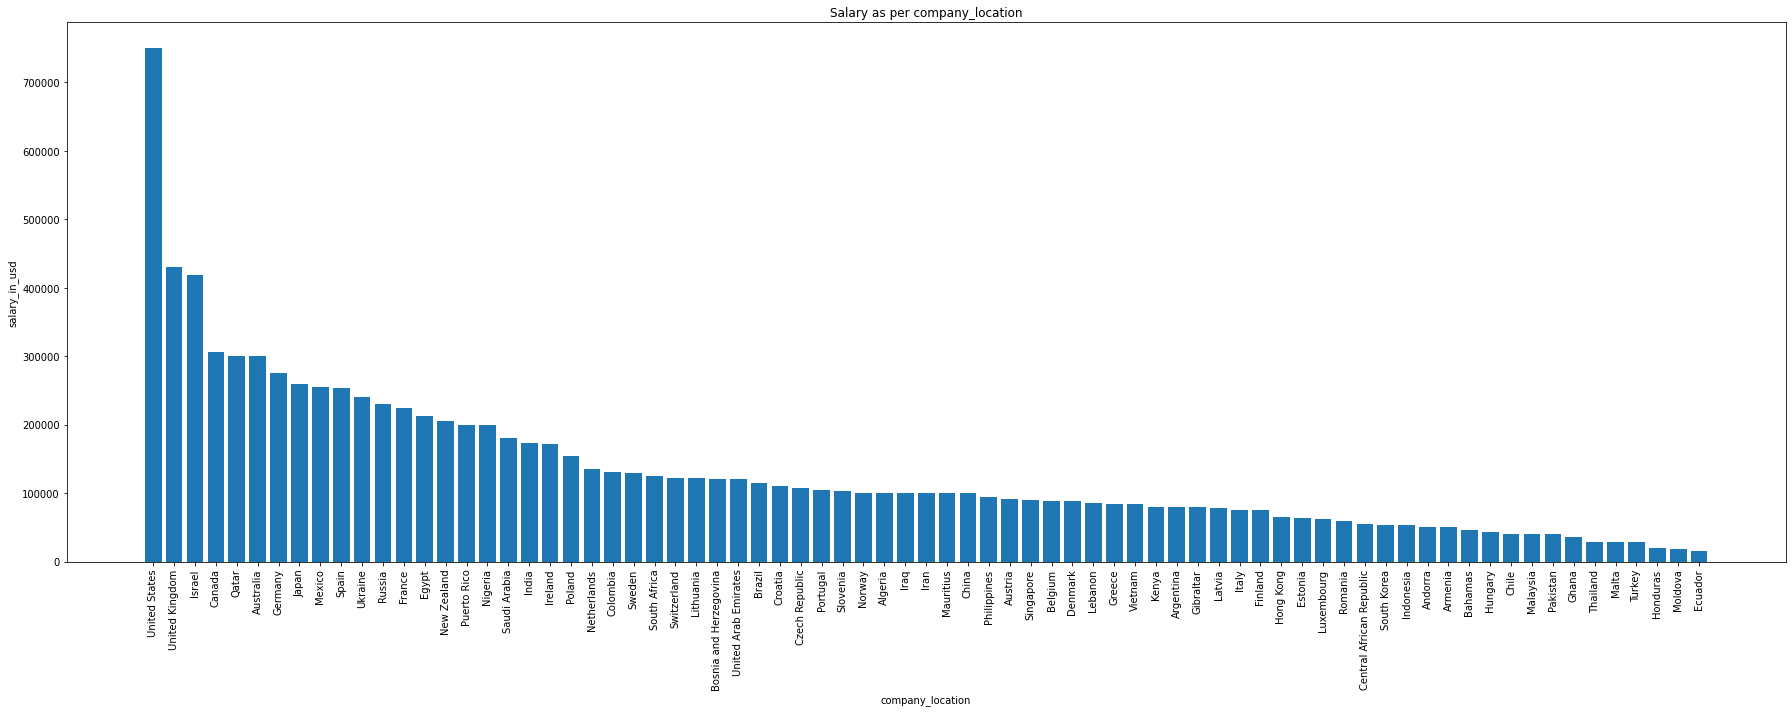

In [13]:
plt.figure(figsize=(25,10))
plt.bar(data=df.sort_values(by='salary_in_usd', ascending=False), x=('company_location'), height=('salary_in_usd'))
plt.xlabel('company_location')
plt.ylabel('salary_in_usd')
plt.title('Salary as per company_location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Employee residencewise salary

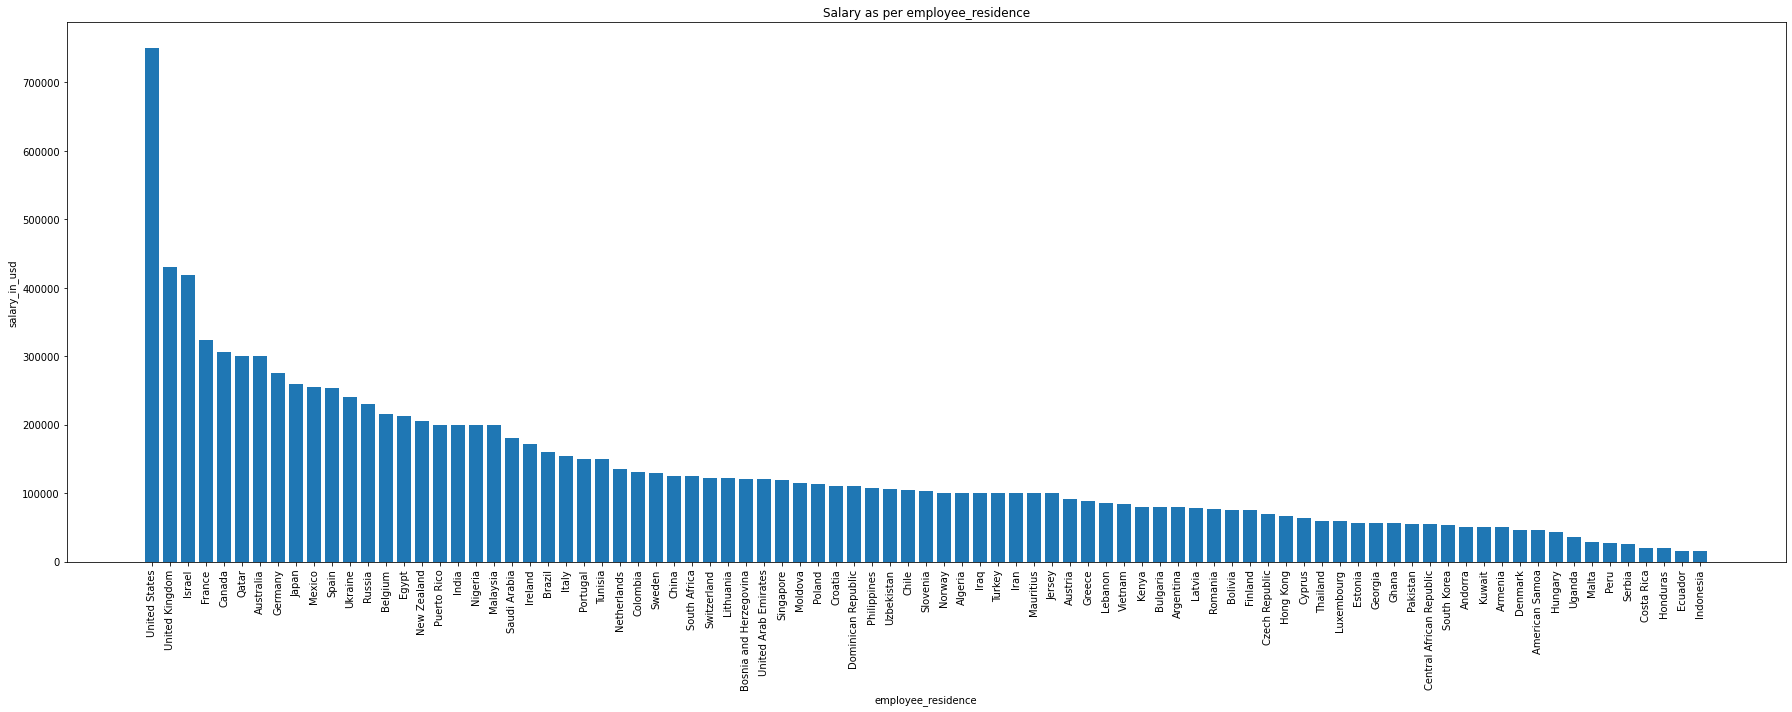

In [14]:
plt.figure(figsize=(25,10))
plt.bar(data=df.sort_values(by='salary_in_usd', ascending=False), x=('employee_residence'), height=('salary_in_usd'))
plt.xlabel('employee_residence')
plt.ylabel('salary_in_usd')
plt.title('Salary as per employee_residence')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Yearwise salary getting by employee at their residence

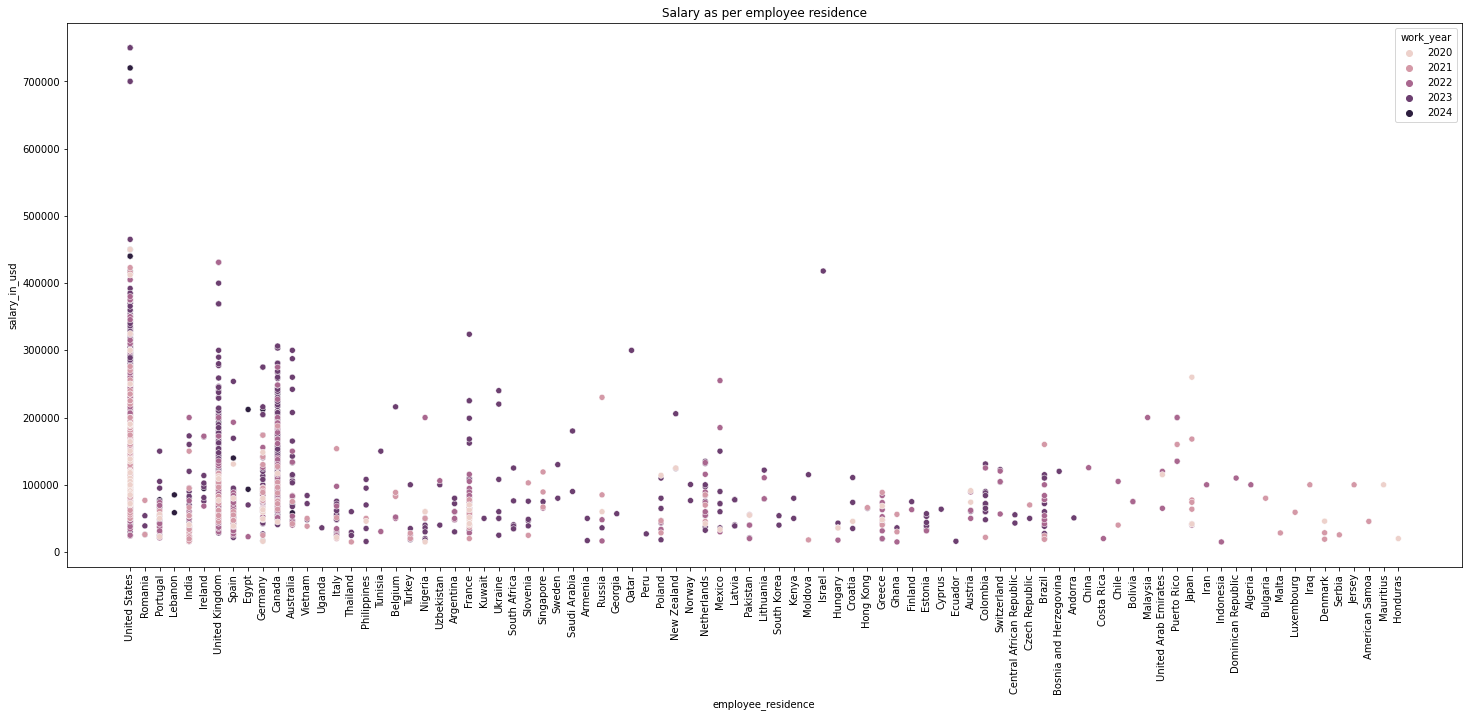

In [15]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=df,x="employee_residence",y="salary_in_usd", hue="work_year")
plt.xlabel('employee_residence')
plt.ylabel('salary_in_usd')
plt.title('Salary as per employee residence')
plt.xticks(rotation=90)
plt.show()

### Yearwise salary getting by employee at company's location

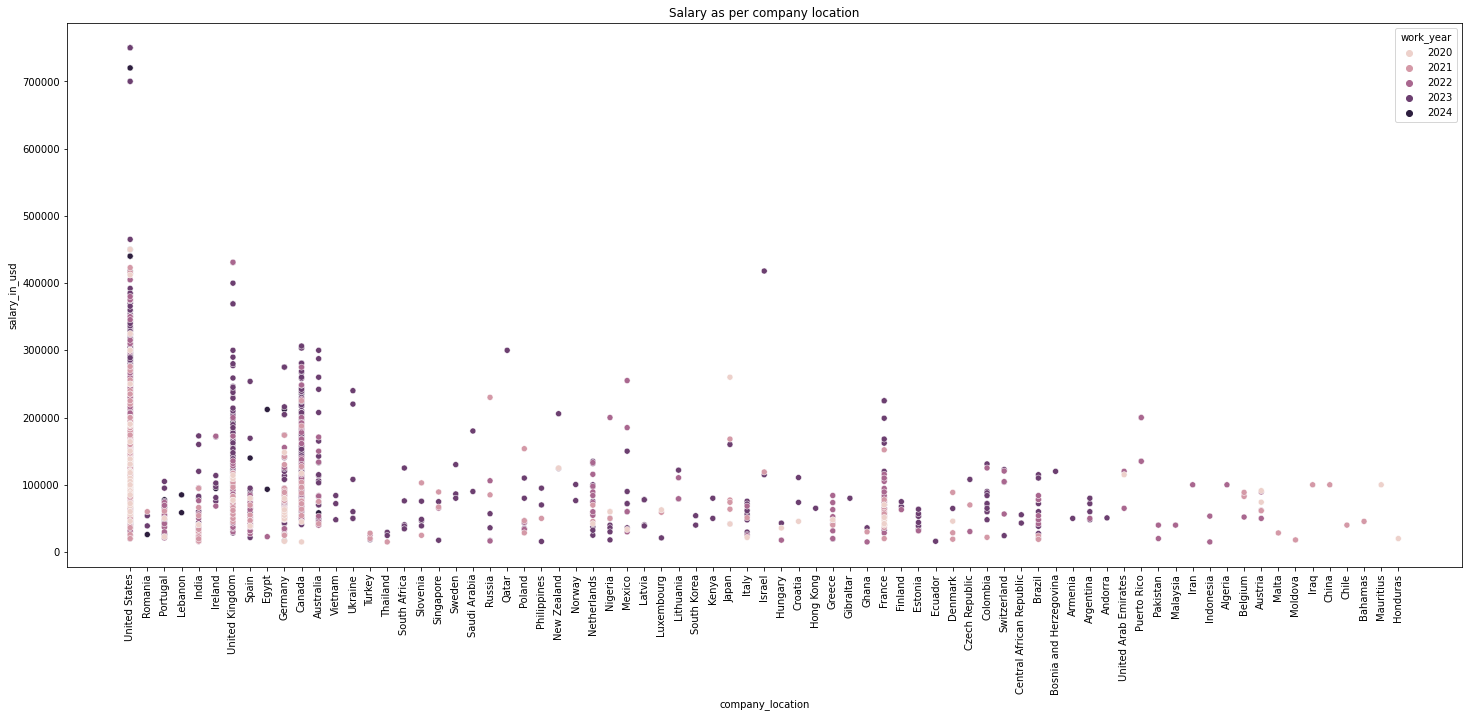

In [16]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=df,x="company_location",y="salary_in_usd", hue="work_year")
plt.xlabel('company_location')
plt.ylabel('salary_in_usd')
plt.title('Salary as per company location')
plt.xticks(rotation=90)
plt.show()

### Average salary by year.

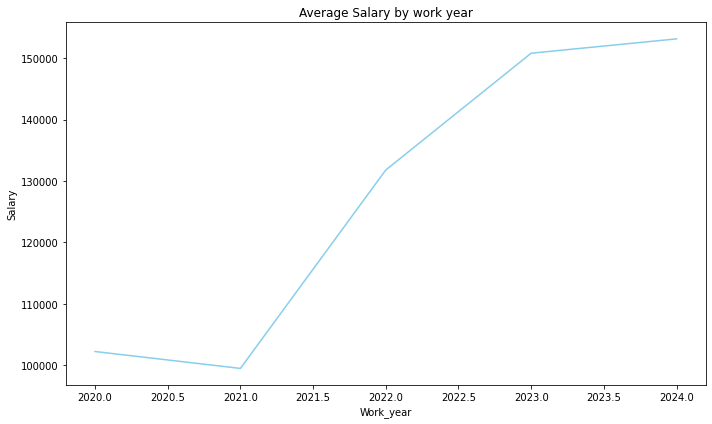

In [17]:
mean_salaries=df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10,6))
plt.plot(mean_salaries.index, mean_salaries.values, color='skyblue')
plt.xlabel('Work_year')
plt.ylabel('Salary')
plt.title('Average Salary by work year') 
plt.tight_layout()
plt.show()

### Maximum salary by year

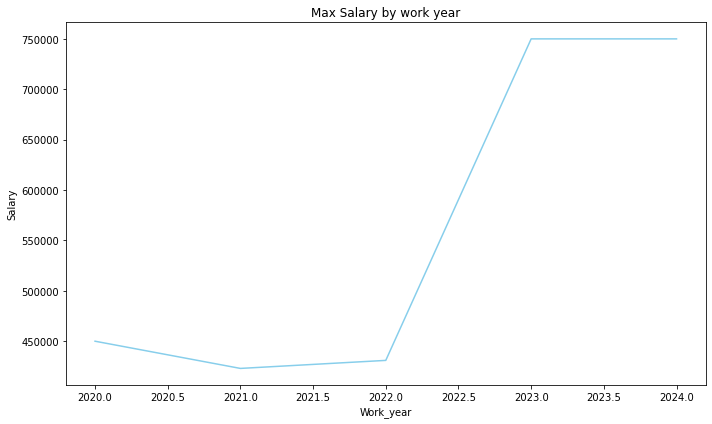

In [18]:
max_salaries=df.groupby('work_year')['salary_in_usd'].max()
plt.figure(figsize=(10,6))
plt.plot(max_salaries.index, max_salaries.values, color='skyblue')
plt.xlabel('Work_year')
plt.ylabel('Salary')
plt.title('Max Salary by work year') 
plt.tight_layout()
plt.show()

### Minimum salary by year

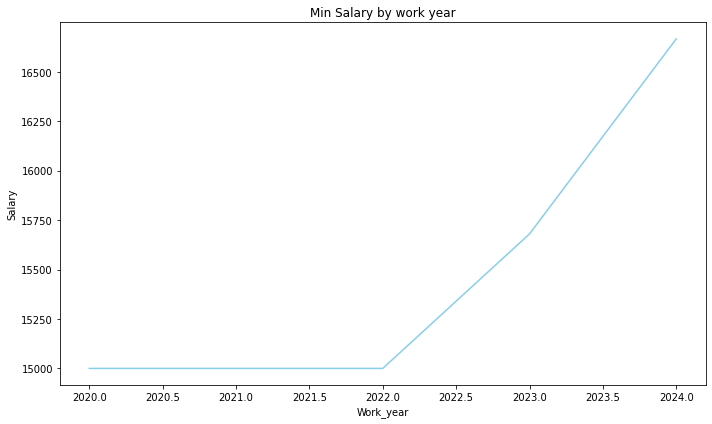

In [19]:
min_salaries=df.groupby('work_year')['salary_in_usd'].min()
plt.figure(figsize=(10,6))
plt.plot(min_salaries.index, min_salaries.values, color='skyblue')
plt.xlabel('Work_year')
plt.ylabel('Salary')
plt.title('Min Salary by work year') 
plt.tight_layout()
plt.show()

### Checking salarywise distribution of data

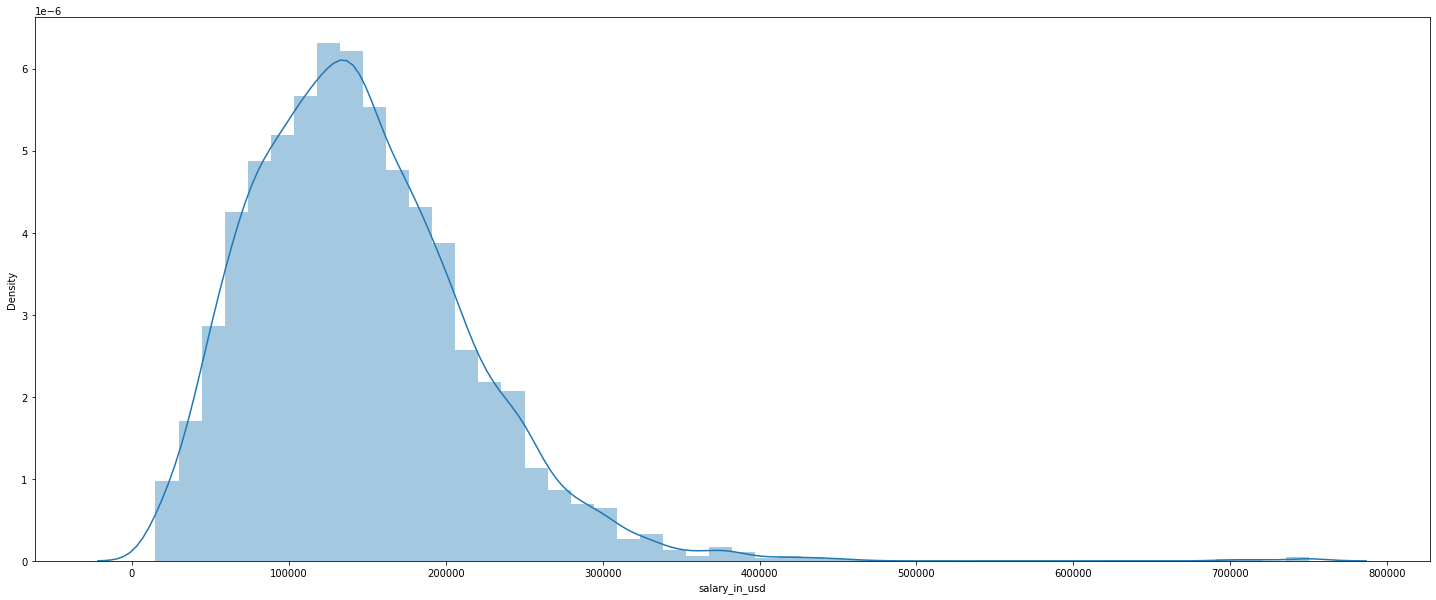

In [20]:
plt.figure(figsize=(25,10))
sns.distplot(df['salary_in_usd'])
plt.show()

### Checking outlier and removing them

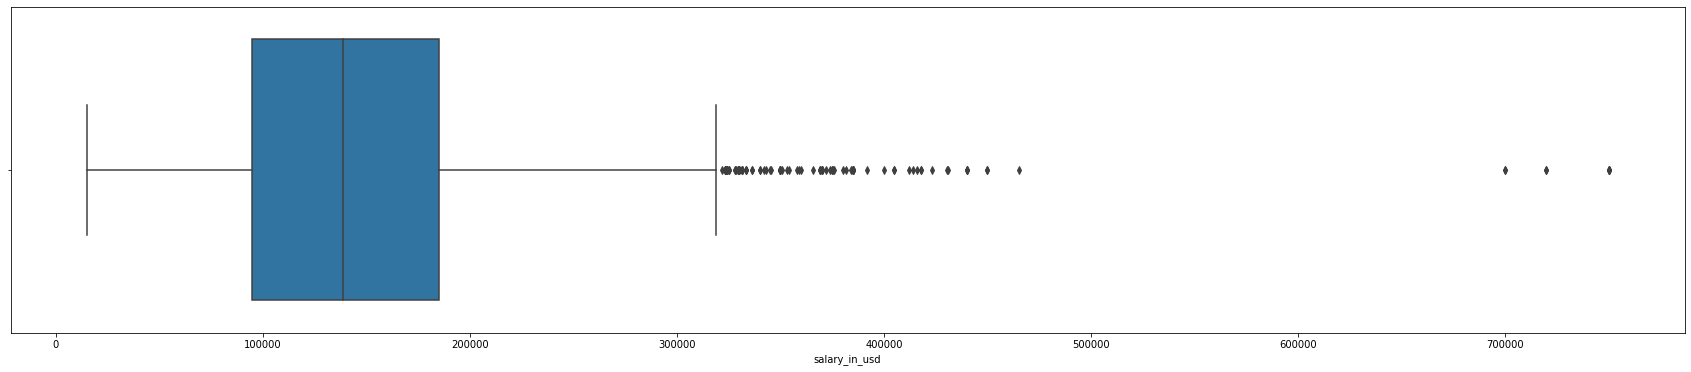

In [21]:
plt.figure(figsize=(30,6))
sns.boxplot(data=df,x=df["salary_in_usd"])
plt.show()

In [22]:
indices_to_drop=df.loc[(df["salary_in_usd"]>320000)].index

In [23]:
df.drop(indices_to_drop, inplace=True)

In [24]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


### Dropping salary_currency column as it is least important.

In [25]:
df.drop(["salary_currency"],axis=1, inplace=True)

### Seperating categorical and numerical column.

In [26]:
df_cat=df.select_dtypes(object)
df_cat

,job_title,experience_level,employment_type,work_models,employee_residence,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,United States,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,United States,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,United States,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,United States,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,United States,United States,Medium
...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,Canada,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,Nigeria,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,Canada,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,Austria,Austria,Large


### Label encoding of categorical column.

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

In [28]:
df_cat

,job_title,experience_level,employment_type,work_models,employee_residence,company_location,company_size
0,45,2,2,2,83,73,1
1,45,2,2,2,83,73,1
2,71,3,2,2,83,73,1
3,71,3,2,2,83,73,1
4,18,2,2,1,83,73,1
...,...,...,...,...,...,...,...
6594,127,0,0,0,12,10,0
6595,127,1,2,1,56,10,1
6596,100,3,2,0,12,10,0
6597,45,2,2,0,6,5,0


In [29]:
df_num=df.select_dtypes(['int','float'])
df_num

,work_year,salary,salary_in_usd
0,2024,148100,148100
1,2024,98700,98700
2,2024,140032,140032
3,2024,100022,100022
4,2024,120000,120000
...,...,...,...
6594,2020,60000,44753
6595,2020,15000,15000
6596,2020,157000,117104
6597,2020,65000,74130


### Checking skewness and corelation of numerical column.

In [30]:
from scipy.stats import skew

work_year
-1.2854050662070664


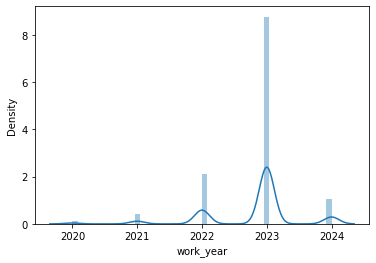

salary
34.68876533292304


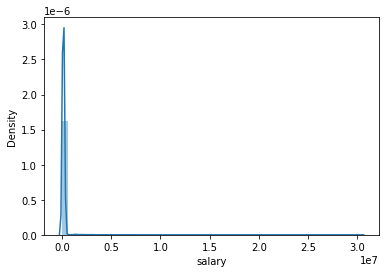

salary_in_usd
0.3801543597939313


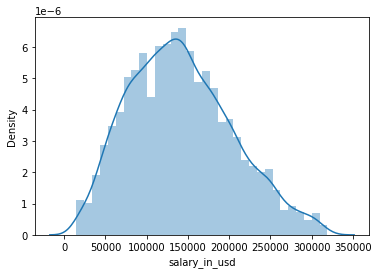

In [31]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))

    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

<AxesSubplot:>

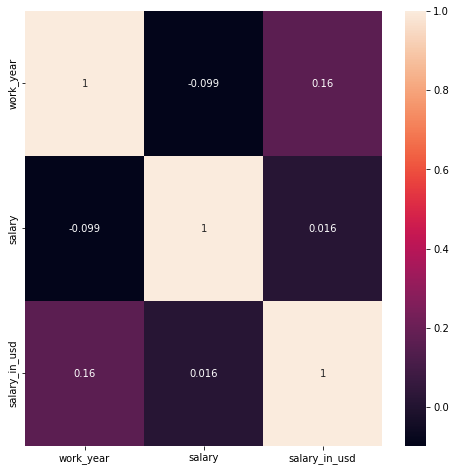

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num.corr(), annot=True)

### Removing skew of target variable.

In [33]:
skew(df_num["salary_in_usd"])

0.3801543597939313

In [34]:
df_num["salary_in_usd"]=np.sqrt(df_num["salary_in_usd"])

In [35]:
skew(df_num["salary_in_usd"])

-0.1790334048576391

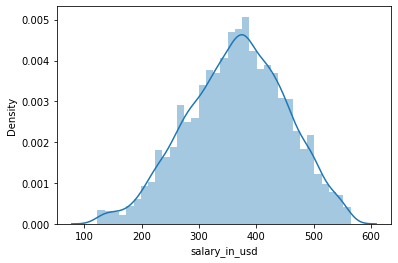

In [36]:
plt.figure()
sns.distplot(df_num["salary_in_usd"])
plt.show()

### Seperating x and y.

In [37]:
y=df_num["salary_in_usd"]
y

0       384.837628
1       314.165561
2       374.208498
3       316.262549
4       346.410162
           ...    
6594    211.549049
6595    122.474487
6596    342.204617
6597    272.268250
6598    302.054631
Name: salary_in_usd, Length: 6492, dtype: float64

In [38]:
x=pd.concat([df_cat,df['work_year']],axis=1)
x

,job_title,experience_level,employment_type,work_models,employee_residence,company_location,company_size,work_year
0,45,2,2,2,83,73,1,2024
1,45,2,2,2,83,73,1,2024
2,71,3,2,2,83,73,1,2024
3,71,3,2,2,83,73,1,2024
4,18,2,2,1,83,73,1,2024
...,...,...,...,...,...,...,...,...
6594,127,0,0,0,12,10,0,2020
6595,127,1,2,1,56,10,1,2020
6596,100,3,2,0,12,10,0,2020
6597,45,2,2,0,6,5,0,2020


### Model building
### As the baseline model for continuous data is Linear Regression so we will check accuracy by Linear Regression first.

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [41]:
ypred

array([300.93082936, 271.30409488, 338.41946879, ..., 387.23430986,
       372.58523027, 383.71335837])

<AxesSubplot:xlabel='salary_in_usd'>

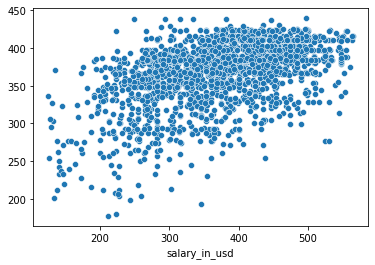

In [42]:
sns.scatterplot(x=ytest,y=ypred)

In [43]:
from sklearn.metrics import r2_score

In [44]:
print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

Accuracy= 21.84%


### Accuracy by Linear Regression is 22%.
### Checking accuracy by applying different model.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [46]:
rf=RandomForestRegressor()
knr=KNeighborsRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()

In [47]:
def build_model(model_obj):
    model_obj.fit(xtrain,ytrain)
    ypred=model_obj.predict(xtest)
    print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

In [48]:
build_model(rf)

Accuracy= 40.94%


In [49]:
build_model(knr)

Accuracy= 34.02%


In [50]:
build_model(svr)

Accuracy= 0.35%


In [51]:
build_model(dtr)

Accuracy= 35.27%


### Best accuracy is given by Random forest and i.e. 41%

### Predictions

In [52]:
for i in x:
    print(i,x[i].max())
    print(i,x[i].min())

job_title 129
job_title 0
experience_level 3
experience_level 0
employment_type 3
employment_type 0
work_models 2
work_models 0
employee_residence 85
employee_residence 0
company_location 74
company_location 0
company_size 2
company_size 0
work_year 2024
work_year 2020


In [53]:
a=int(input("enter the value of Job title "))                      # range (0-129)
b= int(input("enter the value of experience_level "))              # range (0-3)
c=float(input("enter the value of employment_type "))              # range (0-3)
d=int(input("enter the value of work_models "))                    # range (0-2)
e=float(input("enter the value of employee_residence "))           # range (0-85)
f=int(input("enter the value of company_location "))               # range (0-74)
g=float(input("enter the value of company_size "))                 # range (0-2)
h=int(input("enter the value of work_year "))                 

m=rf.predict([[a,b,c,d,e,f,g,h]])[0]
print("The data science salary in ",h, "will be", m, "usd")   

enter the value of Job title 129
enter the value of experience_level 3
enter the value of employment_type 3
enter the value of work_models 2
enter the value of employee_residence 85
enter the value of company_location 74
enter the value of company_size 2
enter the value of work_year 2025
The data science salary in  2025 will be 432.5038435700975 usd


In [54]:
a=int(input("enter the value of Job title "))                      # range (0-129)
b= int(input("enter the value of experience_level "))              # range (0-3)
c=float(input("enter the value of employment_type "))              # range (0-3)
d=int(input("enter the value of work_models "))                    # range (0-2)
e=float(input("enter the value of employee_residence "))           # range (0-85)
f=int(input("enter the value of company_location "))               # range (0-74)
g=float(input("enter the value of company_size "))                 # range (0-2)
h=int(input("enter the value of work_year "))                 

m=rf.predict([[a,b,c,d,e,f,g,h]])[0]
print("The data science salary in ",h, "will be", m, "usd")   

enter the value of Job title 1
enter the value of experience_level 1
enter the value of employment_type 1
enter the value of work_models 1
enter the value of employee_residence 1
enter the value of company_location 1
enter the value of company_size 1
enter the value of work_year 2025
The data science salary in  2025 will be 322.64686298448896 usd


### For amking web application

In [55]:
y1=df_num["salary_in_usd"]
y1

0       384.837628
1       314.165561
2       374.208498
3       316.262549
4       346.410162
           ...    
6594    211.549049
6595    122.474487
6596    342.204617
6597    272.268250
6598    302.054631
Name: salary_in_usd, Length: 6492, dtype: float64

In [56]:
x1=pd.concat([df.select_dtypes(object),df['work_year']],axis=1)
x1

,job_title,experience_level,employment_type,work_models,employee_residence,company_location,company_size,work_year
0,Data Engineer,Mid-level,Full-time,Remote,United States,United States,Medium,2024
1,Data Engineer,Mid-level,Full-time,Remote,United States,United States,Medium,2024
2,Data Scientist,Senior-level,Full-time,Remote,United States,United States,Medium,2024
3,Data Scientist,Senior-level,Full-time,Remote,United States,United States,Medium,2024
4,BI Developer,Mid-level,Full-time,On-site,United States,United States,Medium,2024
...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,Canada,Canada,Large,2020
6595,Staff Data Analyst,Executive-level,Full-time,On-site,Nigeria,Canada,Medium,2020
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,Canada,Canada,Large,2020
6597,Data Engineer,Mid-level,Full-time,Hybrid,Austria,Austria,Large,2020


In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [59]:
trf=ColumnTransformer([("trf",OneHotEncoder(drop="first",sparse=False,handle_unknown="infrequent_if_exist"),["job_title","experience_level","employment_type","work_models","employee_residence","company_location","company_size"])],remainder="passthrough")

In [60]:
from sklearn.pipeline import Pipeline 

In [61]:
pipe=Pipeline(steps=[("step1",trf),
                    ("step2",RandomForestRegressor())])

In [62]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse=False),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'work_models',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('step2', RandomForestRegressor())])

In [63]:
ypred=pipe.predict(xtest)

In [64]:
print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

Accuracy= 42.71%


In [65]:
new_data_range = pd.DataFrame({
    'job_title': ['Data Engineer'] ,           
    'experience_level': ['Entry-level'] ,      
    'employment_type': ['Full-time'] ,         
    'work_models': ['On-site'] ,               
    'employee_residence': ['United States'] ,  
    'company_location': ['United States'] ,    
    'company_size': ['Medium'] ,               
    'work_year': 2025                          
})

In [66]:
predicted_salaries = pipe.predict(new_data_range)[0]

In [67]:
print("Salary for",new_data_range['job_title'][0],"for the year",new_data_range['work_year'][0],"will be",predicted_salaries,"usd")

Salary for Data Engineer for the year 2025 will be 322.57085833811954 usd


In [68]:
import pickle
pickle.dump(pipe , open("salary_pred.pkl" , "wb"))

In [69]:
pickle.dump(trf, open("column_trans.pkl", "wb"))

In [70]:
xtrain.shape

(4544, 8)

In [71]:
xtest.shape

(1948, 8)

In [72]:
ytrain.shape

(4544,)

In [73]:
ytest.shape

(1948,)